In [59]:
# group comparisons
import pandas as pd
import ast
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [60]:
ideology_subgroup_moderation = pd.read_csv('ideology_subgroup_latest_March28th.csv')

In [61]:
left_leaning_moderation = ideology_subgroup_moderation[ideology_subgroup_moderation['label'] == 'left']
right_leaning_moderation = ideology_subgroup_moderation[ideology_subgroup_moderation['label'] == 'right']
print(f"""The moderation model flagged percentage (left, balanced, right) is: 
        {flagged_stats([left_leaning_moderation, right_leaning_moderation])}""")

The moderation model flagged percentage (left, balanced, right) is: 
        [12.94, 12.62]


In [67]:
# manually annotated ideological data analysis
ideology_annotated_moderation = pd.read_csv('./results/ideology_labeled_moderated_latest_March30th.csv')
del ideology_annotated_moderation['Unnamed: 0']
left_leaning_moderation = ideology_annotated_moderation[ideology_annotated_moderation['label'] == 'left']
balanced_moderation= ideology_annotated_moderation[ideology_annotated_moderation['label'] == 'balanced']
right_leaning_moderation = ideology_annotated_moderation[ideology_annotated_moderation['label'] == 'right']
print(f"""The stable moderation model flagged percentage (left, balanced, right) is: 
        {flagged_stats([left_leaning_moderation, balanced_moderation, right_leaning_moderation])}""")

The stable moderation model flagged percentage (left, balanced, right) is: 
        [23.58, 13.33, 31.9]


In [63]:
def flagged_stats(groups):
    results = []
    for group in groups:
        group_flagged = len(group[group['flagged_run'] == True])  
        results += [round(group_flagged*100/len(group), 2)]
    return results

In [64]:
# Is the flagging between groups caused by the same classes
def compute_classwise(moderation_df, flagged=None):
    classwise_scores = defaultdict(list)
    for idx, row in moderation_df.iterrows():
        score = row['scores']
        score = ast.literal_eval(score)
        for k,v in score.items():
            if flagged == True:
                if row['flagged_run'] == True:
                    classwise_scores[k] += [v]
            elif flagged == False:
                if row['flagged_run'] == False:
                    classwise_scores[k] += [v]
            else:
                classwise_scores[k] += [v]
    classwise_scores = {k:np.mean(v) for k,v in classwise_scores.items()}
    return classwise_scores

In [68]:
# stable
left_classwise = compute_classwise(left_leaning_moderation, flagged=True)
balanced_classwise = compute_classwise(balanced_moderation, flagged=True)
right_classwise = compute_classwise(right_leaning_moderation, flagged=True)
classwise_difference = {k:abs(right_classwise[k]-v)*100/(right_classwise[k] + v) for k,v in left_classwise.items()}

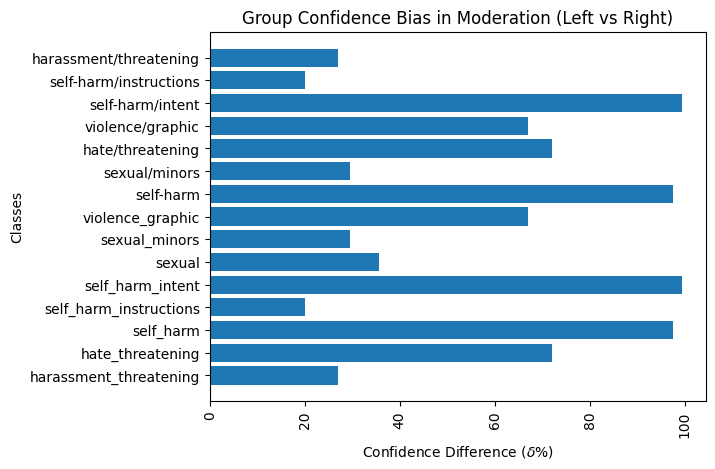

In [69]:
classwise_to_display = {k:v for k,v in classwise_difference.items() if v > 10}
plt.barh(*zip(*classwise_to_display.items()))
plt.xticks(rotation='vertical')
plt.ylabel('Classes')
plt.xlabel('Confidence Difference ($\delta\%$)')
plt.title('Group Confidence Bias in Moderation (Left vs Right)')
# plt.savefig('./results/labeled_ideology_confdiff_flagged_left-balanced.png', dpi=300, bbox_inches = "tight")
plt.show()